In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import  to_categorical



In [ ]:
(xtrain,ytrain) , (xtest,ytest) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
ytrain.shape

(60000,)

In [ ]:
ytrain[0]

9

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

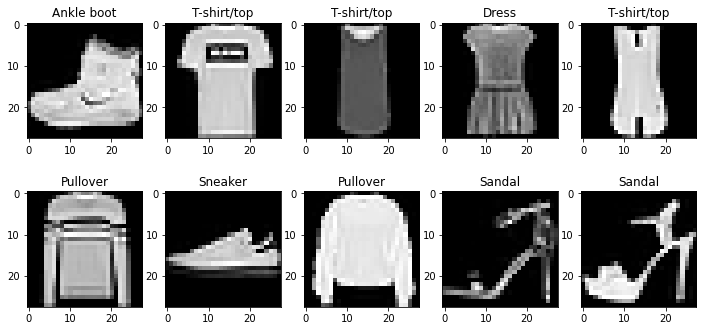

In [ ]:
plt.figure(figsize=(12,15))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap='gray')
    plt.title(class_names[ytrain[i]])
plt.show()

In [ ]:
xtrain.dtype


dtype('uint8')

In [ ]:
ytrain_ohe = to_categorical(ytrain)
ytest_ohe = to_categorical(ytest)
x_train = xtrain.reshape(-1,28,28,1).astype(float)/255
x_test = xtest.reshape(-1,28,28,1).astype(float)/255

In [ ]:
ytrain_ohe.shape

(60000, 10)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Input,Dense,MaxPool2D,Activation,Flatten,Dropout
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model=Sequential()
#model.add(Input(shape=(28,28)))
model.add(Conv2D(filters=10, kernel_size = (3,3), strides = (1,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(1,1)))

model.add(Conv2D(filters=10,kernel_size=(3,3),strides=(1,1)))
model.add(Activation('relu'))

model.add(Flatten())
#model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(
    x=x_train,
    y=ytrain_ohe,
    batch_size=2000,
    epochs=30,
    validation_data = (x_test,ytest_ohe)
)

Epoch 1/30
30/30 [==============================] - 42s 1s/step - loss: 2.0659 - accuracy: 0.3894 - val_loss: 1.8213 - val_accuracy: 0.5922
Epoch 2/30
30/30 [==============================] - 41s 1s/step - loss: 1.5950 - accuracy: 0.6511 - val_loss: 1.3805 - val_accuracy: 0.6651
Epoch 3/30
30/30 [==============================] - 39s 1s/step - loss: 1.2193 - accuracy: 0.6913 - val_loss: 1.0852 - val_accuracy: 0.6926
Epoch 4/30
30/30 [==============================] - 41s 1s/step - loss: 0.9821 - accuracy: 0.7145 - val_loss: 0.9067 - val_accuracy: 0.7176
Epoch 5/30
30/30 [==============================] - 40s 1s/step - loss: 0.8383 - accuracy: 0.7342 - val_loss: 0.7988 - val_accuracy: 0.7327
Epoch 6/30
30/30 [==============================] - 40s 1s/step - loss: 0.7486 - accuracy: 0.7520 - val_loss: 0.7295 - val_accuracy: 0.7456
Epoch 7/30
30/30 [==============================] - 40s 1s/step - loss: 0.6877 - accuracy: 0.7665 - val_loss: 0.6792 - val_accuracy: 0.7634
Epoch 8/30
30/30 [==

In [ ]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_accuracy = model.history.history['accuracy']
validation_accuracy = model.history.history['val_accuracy']

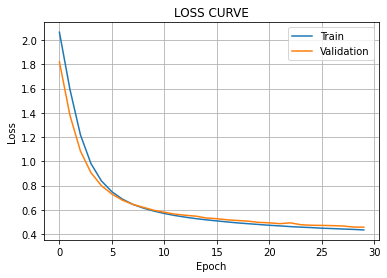

In [ ]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LOSS CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

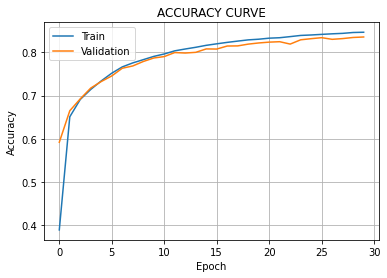

In [ ]:
plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ACCURACY CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()